# Линейная регрессия

## Почему мы изучаем ее, а не глубокие нейронные сети?

В данном уроке мы изучим основные концепции и идеи, которые широко применяются в машинном обучении. Линейная регрессия достаточно простая для понимания, и она до сих пор применяется во многих задачах.

**Добавить больше зачем они нужны и где применяеются сейчас. Хотя бы эксель и ClickHouse.**

**Рассказать что есть из коробки. Но важно понимать инструмент.**

**Расказать про sklearn**

## Постановка задачи

**Переписать постановку**

Представим, что мы хотим определить цену в одном доме квартиры на основании площади квартиры. 
У нас есть база данных полученная от риэлтерской компании. 
В данном случае нам нужно найти зависимость между площадью квартиры и ценой квартиры. 

То есть, нужно найти функцию $f(X) = y$, где $X$ это площадь квартиры, а $y$ это цена на квартиру. Это и есть задача регрессии.


Пример: 

*Нам говорят, у квартиры площадь 45 квадратных метров. Мы берем это значение, помещаем в нашу функцию и получаем значение.* 

$f(45) = 10 000 000$

*И мы говорим в ответ: она будет стоит 10 млн рублей.*

**Больше про функции**

**Другой пример регрессии.** У нас есть интернет сайт и мы хотим предсказать сколько посититлей у нас будет в в определенное время, при этом у нас есть статистика посещений сайта от времени. Наша задача - используя имеющиеся данные о загруженности в прошлом, предсказать количество поситителей в интересующиее нас время. То есть по имеющимся данным построить зависимость интересующией нас переменной от каких то других параметров.

В общем случае задача регрессии - это по входным данным найти число в каком-то *непрерывном* диапазоне. Например: $(-1, 1)$ или же $R$.

Рассмотрим подробнее пример с ценами на квартиру.
Давайте загрузим. После этого в вектре $X$ у нас будет площадь квартиры в $м^2$, а в вектре $y$ цена на квартиру. 

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import regression_helper
from regression_helper import * # Подгружаем функции для визуализации

import numpy as np              # Подгруджаем библиотеку NumPy

X, y = get_data()               # Загружаем данные в X и y

Отобразим эти точки на графике

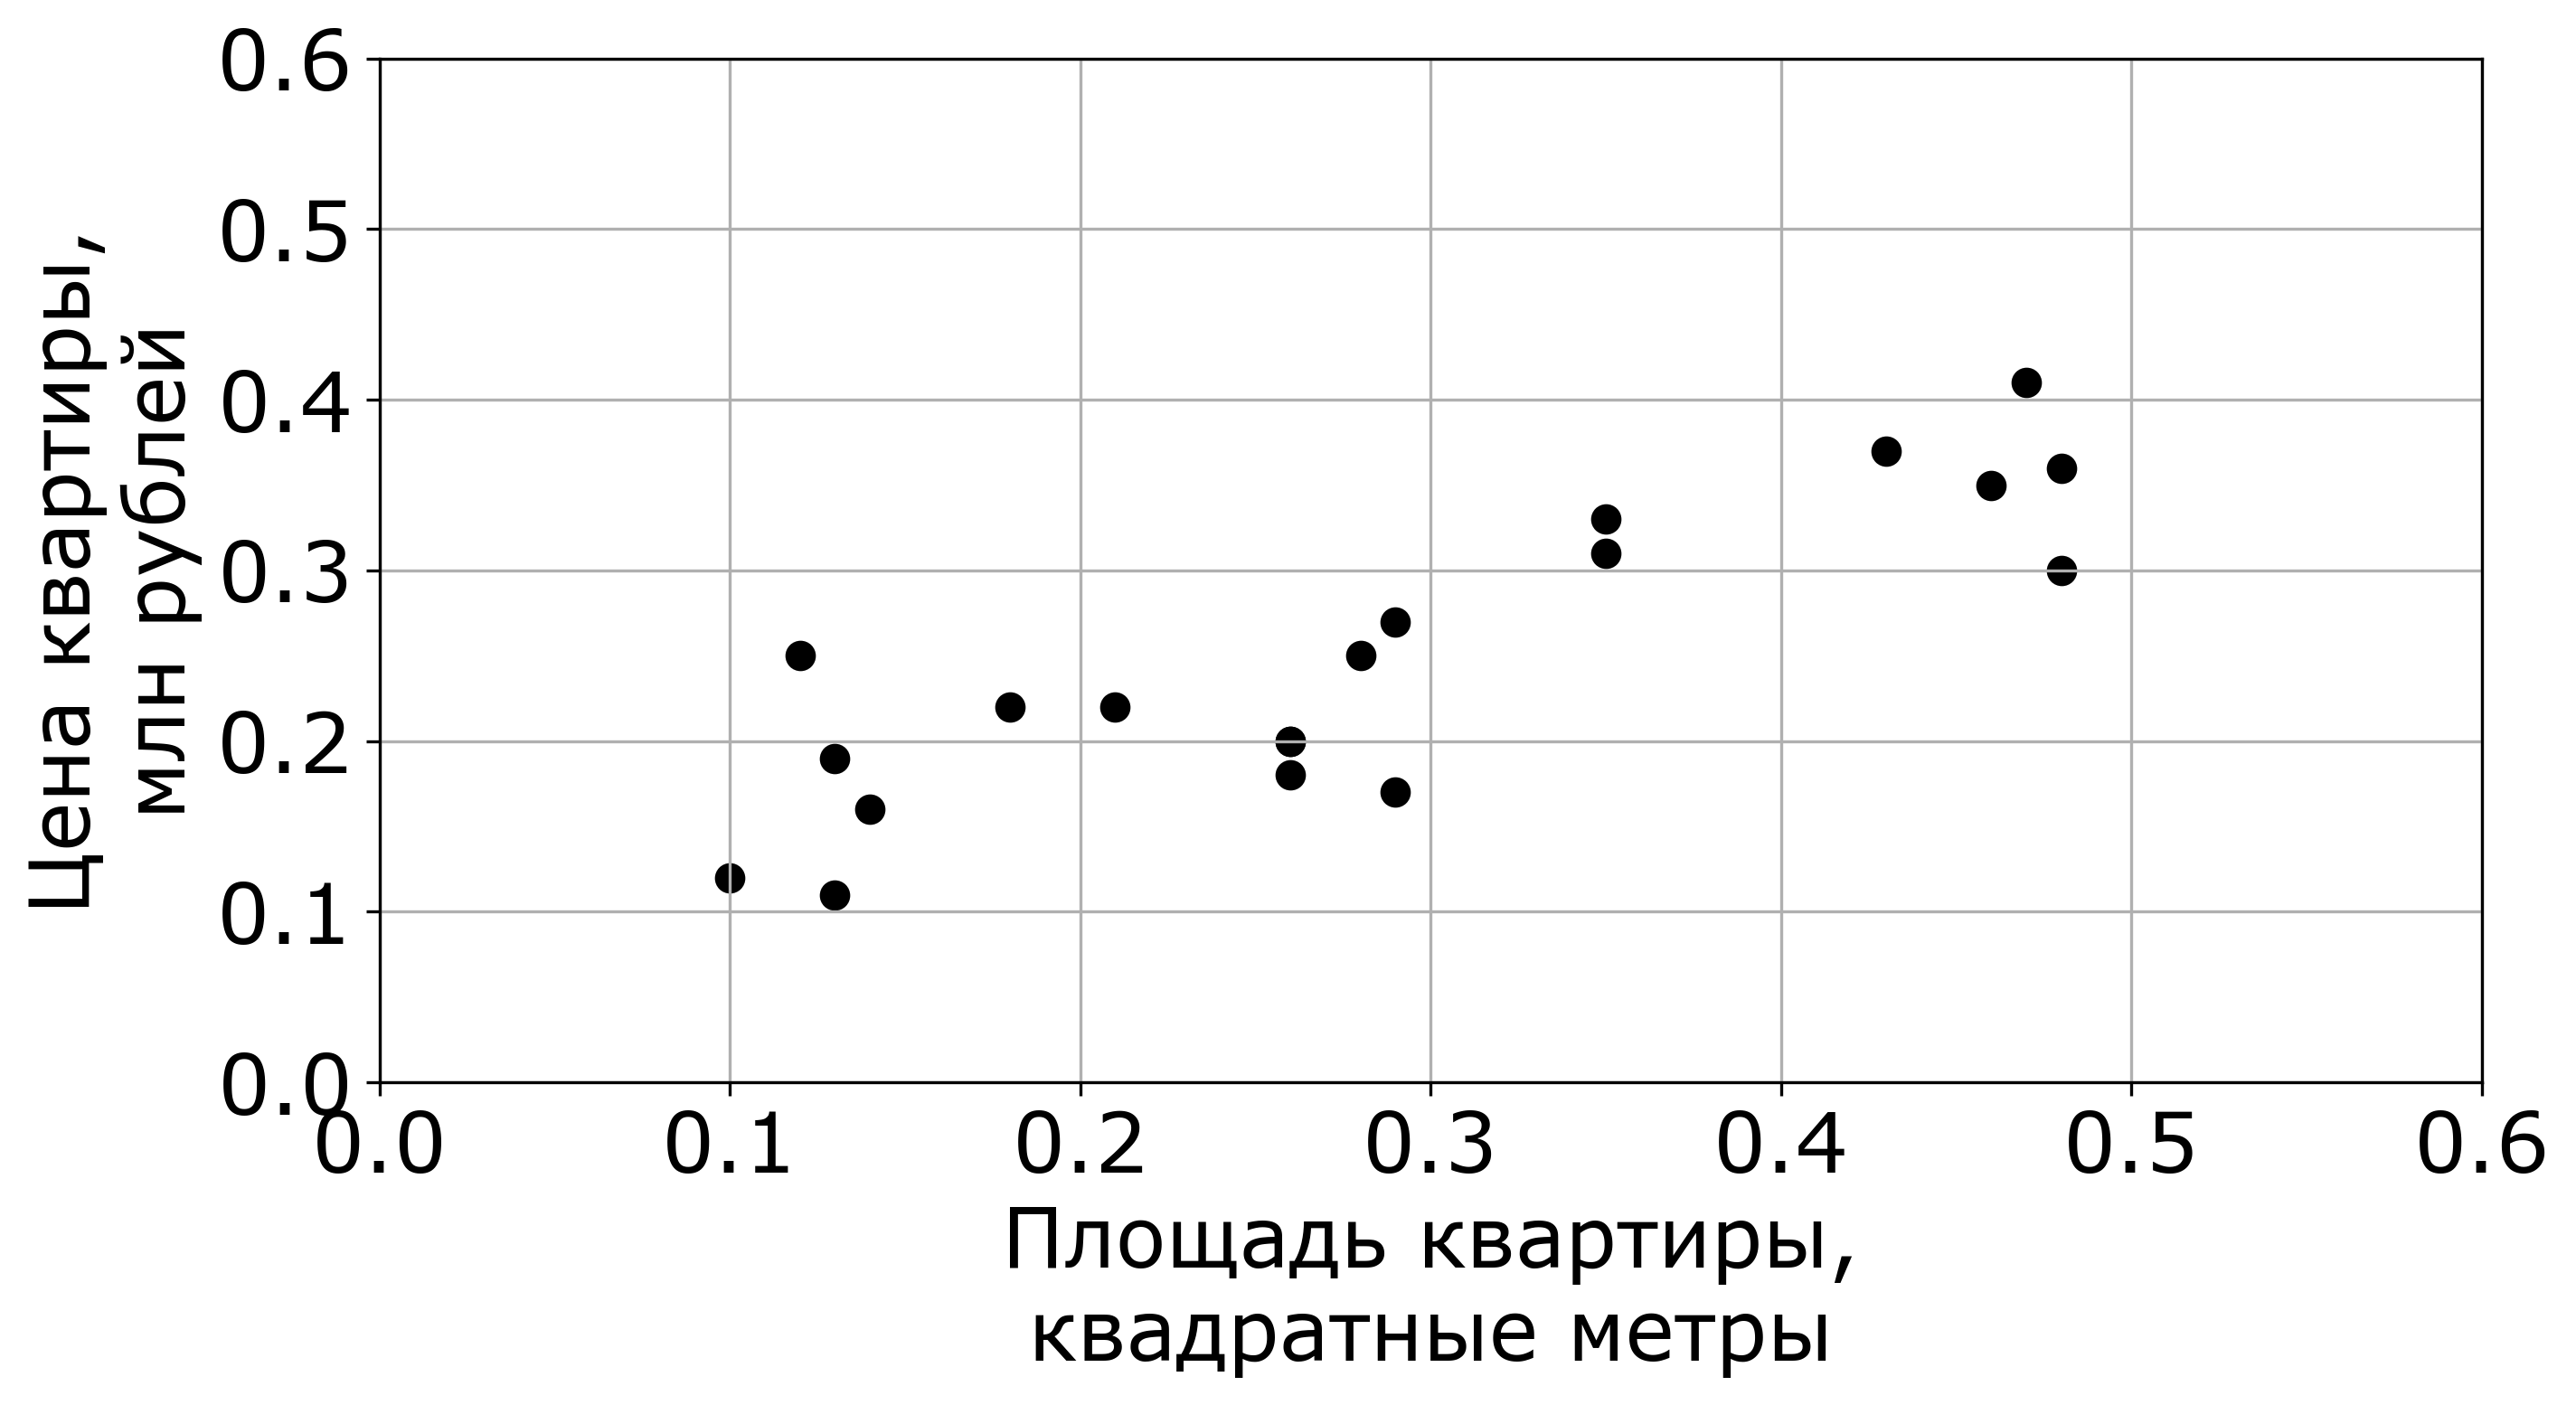

In [3]:
plot_data(X, y)      # Строим диаграму с точками

In [4]:
visualize_X(X)    

    Площадь квартиры, кв. метры
0                          0.10
1                          0.12
2                          0.13
3                          0.13
4                          0.14
5                          0.18
6                          0.21
7                          0.26
8                          0.26
9                          0.26
10                         0.28
11                         0.29
12                         0.29
13                         0.35
14                         0.35
15                         0.43
16                         0.46
17                         0.47
18                         0.48
19                         0.48


In [5]:
visualize_y(y)

    Цена квартиры, млн. руб.
0                       0.12
1                       0.25
2                       0.11
3                       0.19
4                       0.16
5                       0.22
6                       0.22
7                       0.18
8                       0.20
9                       0.20
10                      0.25
11                      0.27
12                      0.17
13                      0.33
14                      0.31
15                      0.37
16                      0.35
17                      0.41
18                      0.36
19                      0.30


Давайте посмотрим на данные

In [6]:
print(X)

[0.1  0.12 0.13 0.13 0.14 0.18 0.21 0.26 0.26 0.26 0.28 0.29 0.29 0.35
 0.35 0.43 0.46 0.47 0.48 0.48]


$X_i$ в тексте - это ***X[i]*** в коде.

In [7]:
print(X[0])

0.1


In [8]:
print(y)

[0.12 0.25 0.11 0.19 0.16 0.22 0.22 0.18 0.2  0.2  0.25 0.27 0.17 0.33
 0.31 0.37 0.35 0.41 0.36 0.3 ]


Видим, что чем больше площадь квартиры, тем выше ее цена. Можно сделать вывод, что между этими данными есть зависимость.

Допустим мы предполагаем, что данная зависимость может описаться линейной функцией вида $y = kX$, где $X$ это площадь квартиры, а $y$ ее цена, $k$ - коэффициент который мы попытаемся подобрать.

Мы предполагаем, что данную зависимость можно описать такой функцией, это наша гипотеза. 
Давайте нанесем на график несколько линейных функций с разным коэффициентом что бы убедится, что такой вид функции подходит.

In [9]:
choose_slope(X, y)

A Jupyter Widget

Реализуем эту функцию.

Перед каждой функций будем писать что конкретно мы реализуем.

Самая простая реализация в самом простом виде выглядит так:

Для каждого элемента $X_i$ массива $X$ реализовать фукнуию $f(X_i) = kX_i$.

* На входе массив $X$

* На выходе массив со значениями $f(x)$

In [10]:
def dummy_realization(X, k):
    result = []            # Массив 
    for x in X:
        result.append(k*x)
    return np.array(result)

print(dummy_realization(X, k=100))

[10. 12. 13. 13. 14. 18. 21. 26. 26. 26. 28. 29. 29. 35. 35. 43. 46. 47.
 48. 48.]


Это не самая лучшая реализация. 

Можно воспользоватся возможностями numpy.

Для каждого элемента $X_i$ массива $X$ реализовать фукнуию $f(X_i) = kX_i$.

* На входе массив $X$

* На выходе массив со значениями $f(x)$

In [11]:
def f(X, k):
    return k*X

print(f(X=X, k=100))

[10. 12. 13. 13. 14. 18. 21. 26. 26. 26. 28. 29. 29. 35. 35. 43. 46. 47.
 48. 48.]


При этом, эта функция также работает и для одного элемента.

In [12]:
print(f(X=X[0], k=100))

10.0


### Разница во времени выполнения на 100000 элементов в ndarray

Функция                | Среднее время (микросекунд) 
-----------------------|-----------------------------
dummy_realization      | 31400                       
less_dummy_realization | 13100                       
f                      | 70                          

## Функция ошибки

У нас есть гипотезы. Но как численно определить какая из них лучшая?

Для это введем функцию ошибку, также известную как функцию потерь. Функция ошибки - численное значение того, какая разница между функцией которой мы получили и данными. Обозначается функция потерь как $Loss$, $L$ или $J$. 

Лучше всего не использовать значение $L$. 

$L$ - часто используется как обозначение для функции правдопадобия, которая часто используется в машинном обучении.

Давайте визуализируем разницу между предсказаной нами функцией и реальными данными.

In [13]:
plot_data_and_error(X, y)

A Jupyter Widget

Пусть у нас есть функция (наша модель):  

$\widetilde{y} = f(X) = kX$

То есть, $\widetilde{y}$ является предсказанными нами значениями для $X$. 

А настоящие значения будут равны $y$. 

Тогда ошибку нашего предсказания на $i$-ом примере $\widetilde{y}_i$ можно посчитать как: 

$error = \widetilde{y}_i - y_i$

Если нам не важно в большую или в меньшую сторону мы ошибаемся, можем избавиться от знака, взяв либо модуль либо квадрат ошибки. Для начала давайте возьмем квадрат. О модуле мы поговорим во втором уроке регрессии. Тогда ошибка $j(k)$ на i-ом примере будет равна:

$j(k) = (\widetilde{y}_i - y_i)^2$

$j(k) = (kX_i - y_i)^2$

In [14]:
k = 10
for i in range(X.shape[0]): 
    diff = f(X[i], k) - y[i]
    print(f"Разница на примере {i} равна {diff:.4}")

Разница на примере 0 равна 0.88
Разница на примере 1 равна 0.95
Разница на примере 2 равна 1.19
Разница на примере 3 равна 1.11
Разница на примере 4 равна 1.24
Разница на примере 5 равна 1.58
Разница на примере 6 равна 1.88
Разница на примере 7 равна 2.42
Разница на примере 8 равна 2.4
Разница на примере 9 равна 2.4
Разница на примере 10 равна 2.55
Разница на примере 11 равна 2.63
Разница на примере 12 равна 2.73
Разница на примере 13 равна 3.17
Разница на примере 14 равна 3.19
Разница на примере 15 равна 3.93
Разница на примере 16 равна 4.25
Разница на примере 17 равна 4.29
Разница на примере 18 равна 4.44
Разница на примере 19 равна 4.5


In [15]:
k = 10
for i in range(X.shape[0]): 
    diff_quad = (f(X[i], k) - y[i])**2
    print(f"Квадрат разницы на примере {i} равен {diff_quad:.4}")

Квадрат разницы на примере 0 равен 0.7744
Квадрат разницы на примере 1 равен 0.9025
Квадрат разницы на примере 2 равен 1.416
Квадрат разницы на примере 3 равен 1.232
Квадрат разницы на примере 4 равен 1.538
Квадрат разницы на примере 5 равен 2.496
Квадрат разницы на примере 6 равен 3.534
Квадрат разницы на примере 7 равен 5.856
Квадрат разницы на примере 8 равен 5.76
Квадрат разницы на примере 9 равен 5.76
Квадрат разницы на примере 10 равен 6.503
Квадрат разницы на примере 11 равен 6.917
Квадрат разницы на примере 12 равен 7.453
Квадрат разницы на примере 13 равен 10.05
Квадрат разницы на примере 14 равен 10.18
Квадрат разницы на примере 15 равен 15.44
Квадрат разницы на примере 16 равен 18.06
Квадрат разницы на примере 17 равен 18.4
Квадрат разницы на примере 18 равен 19.71
Квадрат разницы на примере 19 равен 20.25


In [16]:
k = 10
print(f(X, k) - y)

[0.88 0.95 1.19 1.11 1.24 1.58 1.88 2.42 2.4  2.4  2.55 2.63 2.73 3.17
 3.19 3.93 4.25 4.29 4.44 4.5 ]


In [17]:
k = 10
print((f(X, k) - y)**2)

[ 0.7744  0.9025  1.4161  1.2321  1.5376  2.4964  3.5344  5.8564  5.76
  5.76    6.5025  6.9169  7.4529 10.0489 10.1761 15.4449 18.0625 18.4041
 19.7136 20.25  ]


Но это на одном примере. А на всех?

Тогда мы можем посчитать среднюю ошибку $J(k)$ на всех примерах:

$J(k) = \dfrac{1}{N} \sum_{i=0}^{N}{(\widetilde{y}_i - y_i)^2}$ 

$J(k) = \dfrac{1}{N} \sum_{i=0}^{N}{(f(X_i) - y_i)^2}$

$J(k) = \dfrac{1}{N} \sum_{i=0}^{N}{(kX_i - y_i)^2} $

Где $N$ - это колличество примеров, $X_i$ - это площадь i-oй квартиры, $y_i$ - цена для i-oй квартиры, $\widetilde{y}_i$ - предсказанная цена для i-oй квартиры.

***Немного про нотацию*** 

Функция потерь формально зависит от входных данных, реальных выходных данных, вида функции и параметров этой функции. 

То есть, $J(X, y, f, k)$. Но обычно, для краткости, мы предполагаем, что мы используем текущие $X$, $y$ и $f$ и пишем, что функция потерь зависит только от параметров функции.

Давайте реализуем функцию ошибки.

Для входных данных массива $X$ и реального выходного значения $y$ реализовать функцию ошибки. 

На входе:

* Коэффициент $k$ функции $f$

* Массив входных значений $X$

* Массив реальных (верных) выходных значений $y$

На выходе:

* На выходе значение фуникции ошибки $J(k)$

Формула функции ошибки:

$J(k) = \dfrac{1}{N} \sum_{i=0}^{N}{(kX_i - y_i)^2} $

In [18]:
def loss_function(k, X, y):
    
    N = X.shape[0]                    # получаем размер вектора столбца
    # или N = len(X)
   
    J_for_sample = (k*X - y)**2
    J = np.sum(J_for_sample) / N      
    
    # или J = np.mean((k*X - y)**2)
    return J

k = 2
print(loss_function(k, X, y))

0.135955


Давайте рассмотрим ошибки для разных $k$

In [19]:
plot_data_and_J(X, y)

A Jupyter Widget

Давайте теперь визуализируем всю функцию ошибки для всех функция значений $k$.

**Объяснить что это не аналитическая форма. Расказать что это  создано фором и можно сделать только для данного случая**

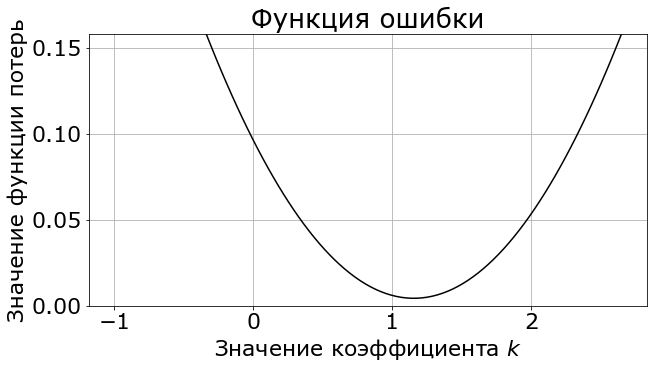

In [20]:
plot_all_J(X, y)

## Производная

Наша задачи - это минимизации функции ошибки. То есть, нужно найти такое $k$, для которого фунция $J(k)$ имеет минимальное значение.

Для того что бы это сделать придется немного потерпеть и вспомнить математику. 

Давайте повторим что такое *производная функции*.

Производная функции $f(x)$ записывается как $f'(x)$ или же как $\dfrac{d f(x)}{dx}$

Сама производная это то, насколько значение функции меняется в зависимости от изменения входного значения. 

В данном случае для какой-то точки $x_0$ производную можно рассматривать 

$f'(x_0) = \dfrac{d f(x_0)}{dx} $

$f'(x_0) = \dfrac{f(x_0+\Delta x) - f(x_0)}{\Delta x}$

$\Delta x \rightarrow 0$

Посмотрим на функцию $f(x) = x^2 + 1.5$

In [21]:
x0 = 1.4
derivation(x0=x0)

A Jupyter Widget

In [22]:
x0 = -1.3
derivation(x0=x0)

A Jupyter Widget

Можно считать, что производная в точке показывает "скорость" изменения функции. Она положительна если функция растет и отрицательно, когда убывает.

Еще ее можно интерпретировать как угол наклона $\alpha$ касательной.

Обычно пишут что $f'(x) = tg(\alpha)$.

Рассмотрим повевдение производной в точках перегиба.

Точки перегиба - это, например, когда функция принимает максимальные и минимальные значения.

In [23]:
derivation(x0=0)

A Jupyter Widget

Точках перегиба, производная равна 0. 

Расмотрим функцию и ее производную и получим ее аналитически.

В какой-то точке $x_0$ производная будет равна:

$f'(x_0) = \dfrac{f(x_0+\Delta x) - f(x_0)}{\Delta x}$


$f(x_0+\Delta x) = (x_0 + \Delta x)^2 + 1.5 = x_0^2 + 2x_0\Delta x + \Delta x^2 + 1.5$


$ \dfrac{f(x_0+\Delta x) - f(x_0)}{\Delta x} = \dfrac{x_0^2 + 2x_0\Delta x + \Delta x^2 + 1.5 - (x_0^2 + 1.5) }{\Delta x} = \dfrac{2x_0\Delta x + \Delta x^2}{\Delta x}$


$\dfrac{2x_0\Delta x + \Delta x^2}{\Delta x} = 2x_0 + \Delta x$

И если мы будем счиать $\Delta x$ очень маленьким числом, тогда 

$f'(x_0) = 2x_0$

In [24]:
plot_simple_func_and_der(False)

A Jupyter Widget

При взятии производной сложной функции использоваться chain rule:

**Chain рул нужно расписать до интуции**

$u = \phi(x)$

$y= f(u)$

$\frac{dy}{dx} = \frac{df(u)}{du} \cdot \frac{du(x)}{dx}$

Производная суммы/разности равна сумме/разности производных:

**Расписать все правила и добавить примеры произоводных для этих правил**

$(f_1(x) + f_2(x))' = f_1'(x) + f_2'(x)$

### Пример 1 ###

$y = sin(3x - 5)$

$u = 3x - 5$

$y = sin(u)$

$\frac{dy}{dx} = \frac{d sin(u)}{du} \cdot \frac{d(3x - 5)}{dx}$ 


$\frac{d sin(u)}{du} = cos(u)$

$\frac{d(3x - 5)}{dx} = 3$


$\frac{dy}{dx} = 3cos(3x - 5)$

### Пример 2 ###

$y = (10x^2 + x)^3$

$u = 10x^2 + x$

$y = u^3$

$\frac{dy}{dx} = \frac{d  u^3}{du} \cdot \frac{d(10x^2 + x)}{dx}$ 


$\frac{d  u^3}{du} = 3u^2$

$\frac{d(10x^2 + x)}{dx} = 20x + 1$

$\frac{dy}{dx} = 3u^2 \cdot(20x + 1) = 3(10x^2 + x)^2 \cdot(20x + 1) $

## Иcпользование производной для поиска минимума J

Рассмотрим как мы можем использовать производную для решения нашей задачи. 

*У нас есть функция ошибки $J(k)$. Нужно найти такое $k_m$, при котором $J(k_m)$ принимает минимальное значение.*

Я думаю, что вы знаете как можно найти значение минимума для данной функции. Нужно взять производную функции ошибки и приравнять ее к нулю. $J'(k) = \frac{dJ(k)}{dk} = 0$.

Таким образом, в нашем случае:

$ J'(k) = \dfrac{dJ(k)}{dk} = \dfrac{d(\dfrac{1}{N}\sum_{i=1}^{N}{(y_i - \widetilde{y}_i)^2})}{dk} $

$\dfrac{dJ(k)}{dk} = 2 \cdot \dfrac{1}{N}\sum_{i=1}^{N} (kX_i - y_i)\dfrac{d(kX_i - y_i)}{dk} $

$\dfrac{dJ(k)}{dk} =  \dfrac{2}{N} \sum_{i=1}^{N} (kX_i - y_i)X_i$ 
          
И для нахождения минимума нужно приравнять производную к нулю и решаем уравнение относительно k. 

$\dfrac{dJ(k)}{dk} =  \dfrac{2}{N} \sum_{i=1}^{N} (kX_i - y_i)X_i = 0$

Решив уравнение, мы получим значение для $k=0.8257$

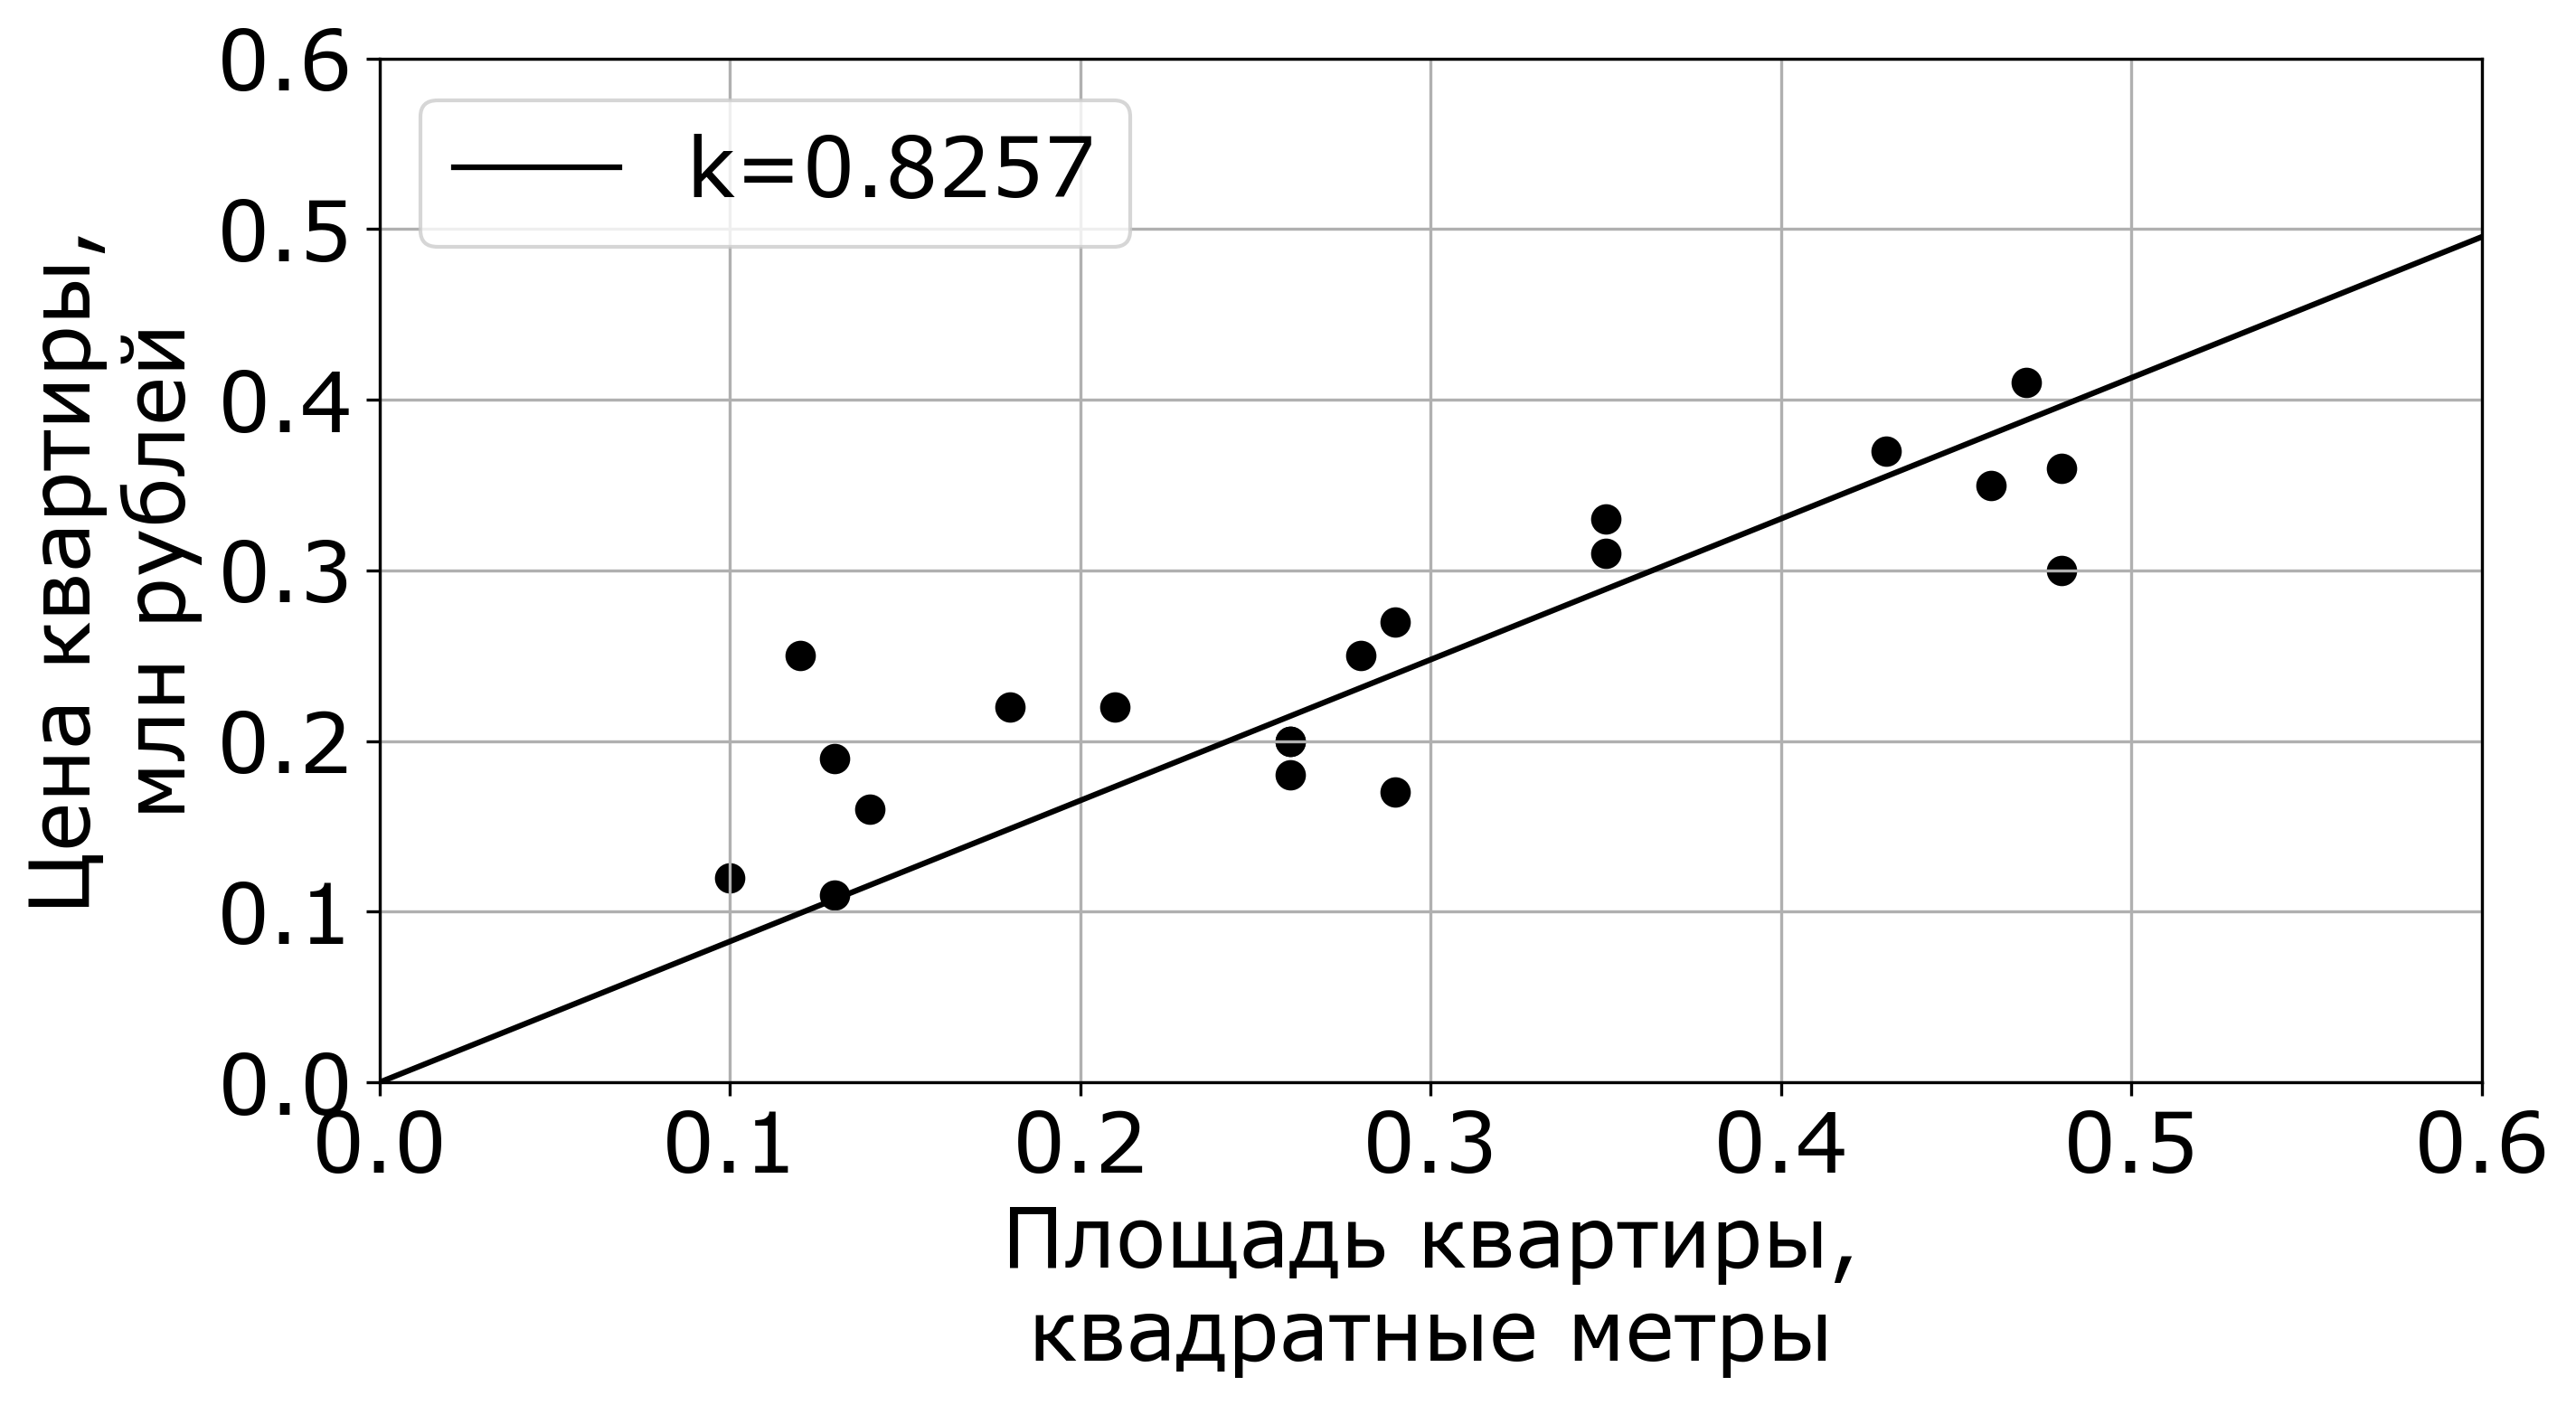

In [25]:
plot_data_and_hyp(X, y, 0.8257)

Но в реальных приложениях не всегда возможно решить это уравнение. 

Поэтому, познакомимся с таким алгоритмом как градиентный спуск. 

Данный алгоритм является одним самых распространенных алгоритмов в машинном обучении.

**Показать что производная слишком большая и нельзя так прыгать используя только ее** 

**Показать что чем больше ошибка, тем больше производная, для MSE**

In [26]:
plot_loss_and_der(X, y, same=True)

A Jupyter Widget

$\dfrac{dJ(k)}{dk} =  \dfrac{2}{N} \sum_{i=1}^{N} (kX_i - y_i)X_i$ 

## Градиентный спуск

**переписать менее математично**

**объяснить альфу**

Как вызнаете, значение производной в точке равно значению тангенса угла наклона касательной в данной точке или же показывает растет ли функция или убывает.

Использую эту информацию мы можем понять где находится минимум и изменить значение $k$ в сторону минимума. 

* Если производная положительная, то нам нужно уменьшать значение $k$. 
* Если производная отрицательная, то нам нужно увеличить значение $k$.  

Таким образом сам алгоритм градиентного спуска можно описать следующим образом.

* Выбираем случайное значение для $k$
* Повторить пока не сойдется:

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; $k_{new} = k - \alpha \cdot \dfrac{d}{dk} J(k)$

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; $k = k_{new}$

Где $\alpha$ это коэффициент, который мы выбреем. 

In [27]:
def gradient_function(k, X, y):
    N = X.shape[0]       
    grad = 2*np.sum((k * X - y) * X) / N                       
    return grad   

k = 1
print(gradient_function(k, X, y))

0.033569999999999996


In [28]:
def gradient_descent(k_init, X, y, alpha, iters):
    k = k_init
    for i in range (0, iters):
        k = k - (alpha * gradient_function(k, X, y))
    return k

k_init = 1.0
alpha = 1
iters = 100
gradient_descent(k_init, X, y, alpha, iters)

0.8257823447868693

Аналитически подсчитаный k = 0.8257

Рассмотрим как ведет себя алгоритм с различными $\alpha$

In [29]:
interactive_gradient_descent(X, y)

A Jupyter Widget

# Немного усложним пример

В качестве гипотезы мы использовали функцияю вида $f(X) = kX$.

Многие из вас могли заметить, что это не совсем линейная функция. Линейная фунция на самом деле выглядит так:

$f(X) = kX + b$.

In [30]:
choose_slope_with_bias(X, y)

A Jupyter Widget

Давайте изменим гипотезу и теперь будем использовать "настоящую" линейную функцию.

Но давайте немного изменим обозначения.

In [31]:
def f(X, k, b):
    return k*X + b

print(f(X=X, k=10, b=-10))

[-9.  -8.8 -8.7 -8.7 -8.6 -8.2 -7.9 -7.4 -7.4 -7.4 -7.2 -7.1 -7.1 -6.5
 -6.5 -5.7 -5.4 -5.3 -5.2 -5.2]


Перепишем функцию ошибки:

$\hat{y} = f(X) = kX + b$. То есть, $\hat{y}$ является предсказанными нами значениями для $X$. 
А настоящие значения будут равны $y$. 

Тогда ошибка на одном примере равна $j(k, b)$ на i-ом примере будет равна $j(k, b) = (\hat{y_i} - y_i)^2 = ((kX_i + b) - y_i)^2$

$J(k, b) = \dfrac{1}{N}\sum_{i=0}^{N}{(\hat{y_i} - y_i)^2}= \dfrac{1}{N} \sum_{i=0}^{N}{((kX_i + b) - y_i)^2} $

То есть теперь у нас ошибка зависит не только от $k$, но и от $b$.

In [32]:
def linearn_loss_function(X, y, k, b):
    
    N = X.shape[0]       # получаем размер вектора столбца
    # или N = len(X)
   
    J = np.sum(((k*X + b) - y)**2)/N
    # или J = np.mean((k*X + b - y)**2)
    return J

k = 0
print(linearn_loss_function(X=X, y=y, k=k, b=10))

95.09881499999999


In [33]:
plot_linear_loss_in_3d(X, y)

A Jupyter Widget

541


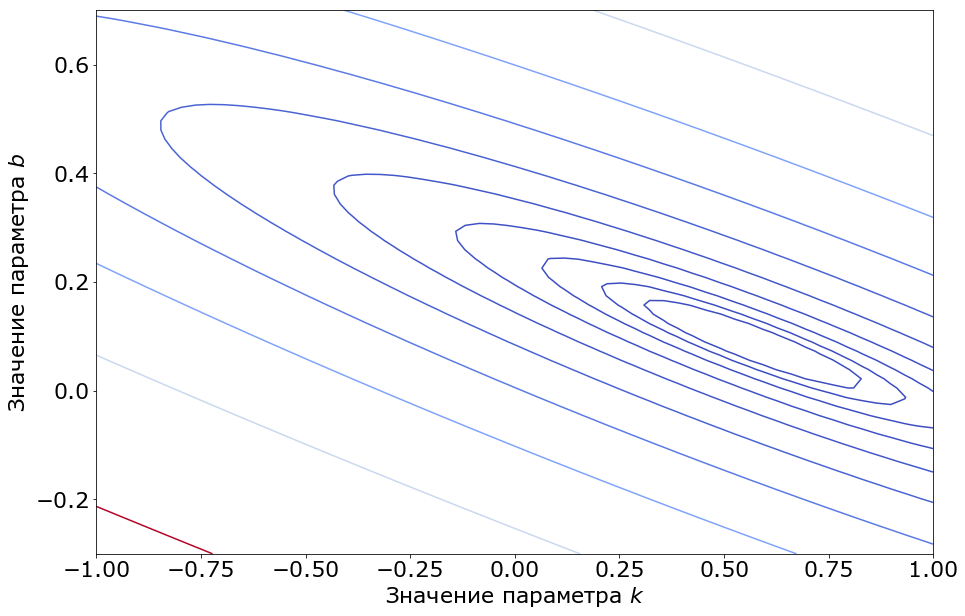

In [45]:
plot_linear_loss_in_3d_up(X, y)

## Градиент

**Пример градиента от функции двух переменых**

Давайте введем понятие градиента.

Градиент фунцкии $\phi(x_0, x_1, \ldots x_N)$ от N переменных это 

N значений: $\dfrac{\delta \phi(x_0, x_1, \ldots x_N)}{\delta x_0}, \dfrac{\delta \phi(x_0, x_1, \ldots x_N)}{\delta x_1}, \ldots \dfrac{\delta \phi(x_0, x_1, \ldots x_N)}{\delta x_N}$

По сути - это координаты вектора, со значениями производных по разным осям. 


$\phi(x, y) = z$ 

$grad (\phi) = \nabla \phi = \dfrac{\delta \phi(x, y)}{\delta x} \cdot \overleftarrow{i} + \dfrac{\delta \phi(x, y)}{\delta y} \cdot \overleftarrow{j}$

$grad (\phi) = \nabla \phi = \{\dfrac{\delta \phi(x, y)}{\delta x}; \dfrac{\delta \phi(x, y)}{\delta y} \}$

$\phi(x, y) = (x + 1.5)^2 + 2.5y^2 + 0.5$

$\dfrac{\delta \phi(x, y)}{\delta x} = 2(x + 1.5) = 2x + 3$

$\dfrac{\delta \phi(x, y)}{\delta y} = 5y$

In [35]:
plot_func_in_3d()

A Jupyter Widget

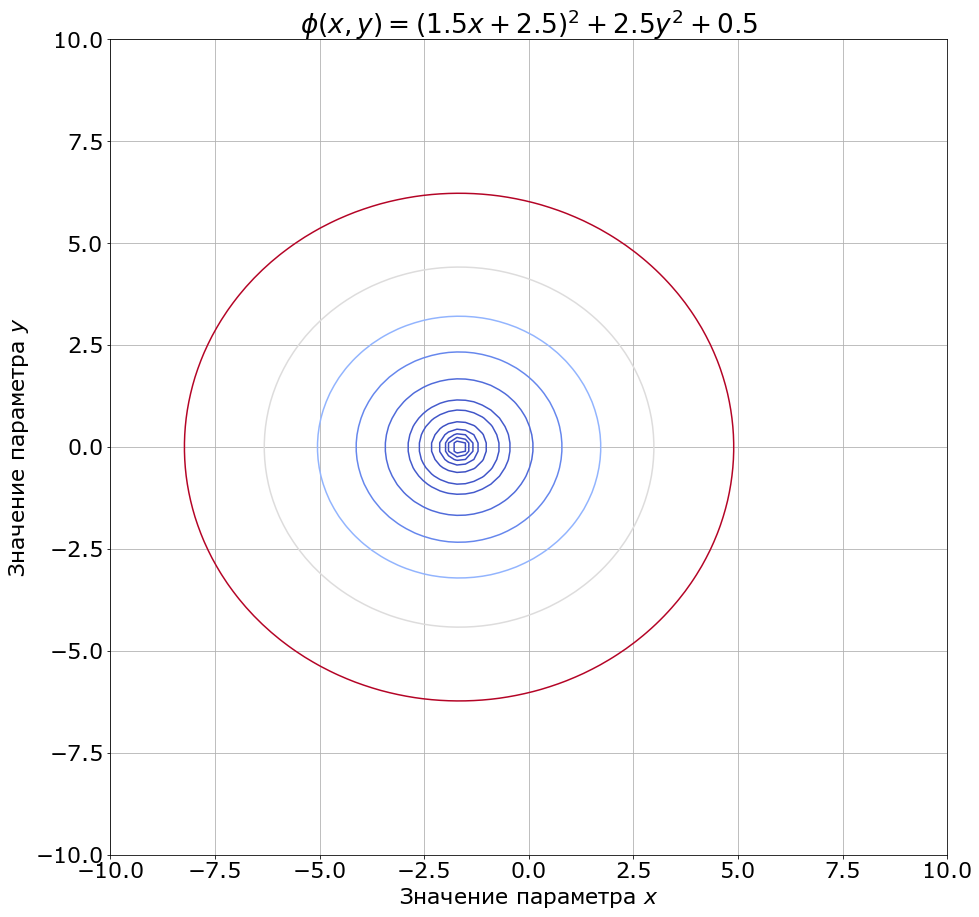

In [36]:
plot_3d_func_with_grad()

$\phi(x, y) = (1.5x + 2.5)^2 + 2.5y^2 + 0.5$

$\dfrac{\delta \phi(x, y)}{\delta x} = 3(1.5x + 2.5) = 4.5x + 7.5$

$\dfrac{\delta \phi(x, y)}{\delta y} = 5y$

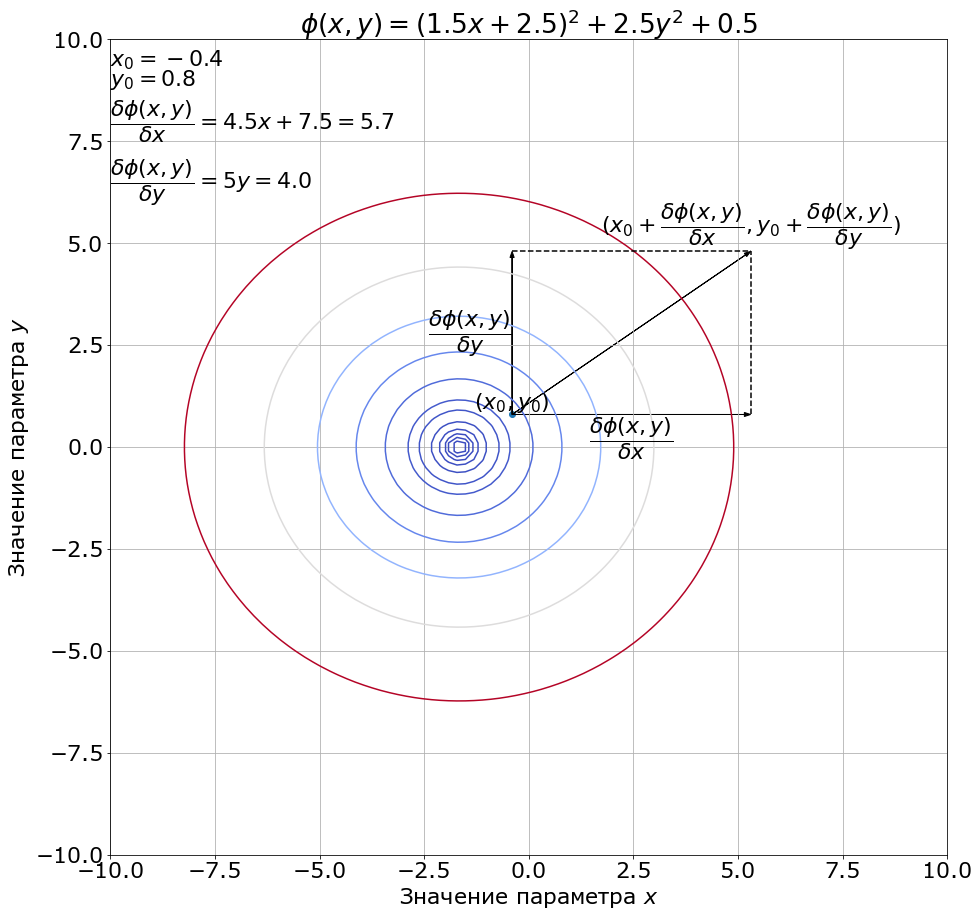

In [37]:
plot_3d_func_with_grad(x0=-0.4, y0=0.8, pos_neg_grad='positive')

$\phi(x, y) = (1.5x + 2.5)^2 + 2.5y^2 + 0.5$

$\dfrac{\delta \phi(x, y)}{\delta x} = 3(1.5x + 2.5) = 4.5x + 7.5$

$\dfrac{\delta \phi(x, y)}{\delta y} = 5y$

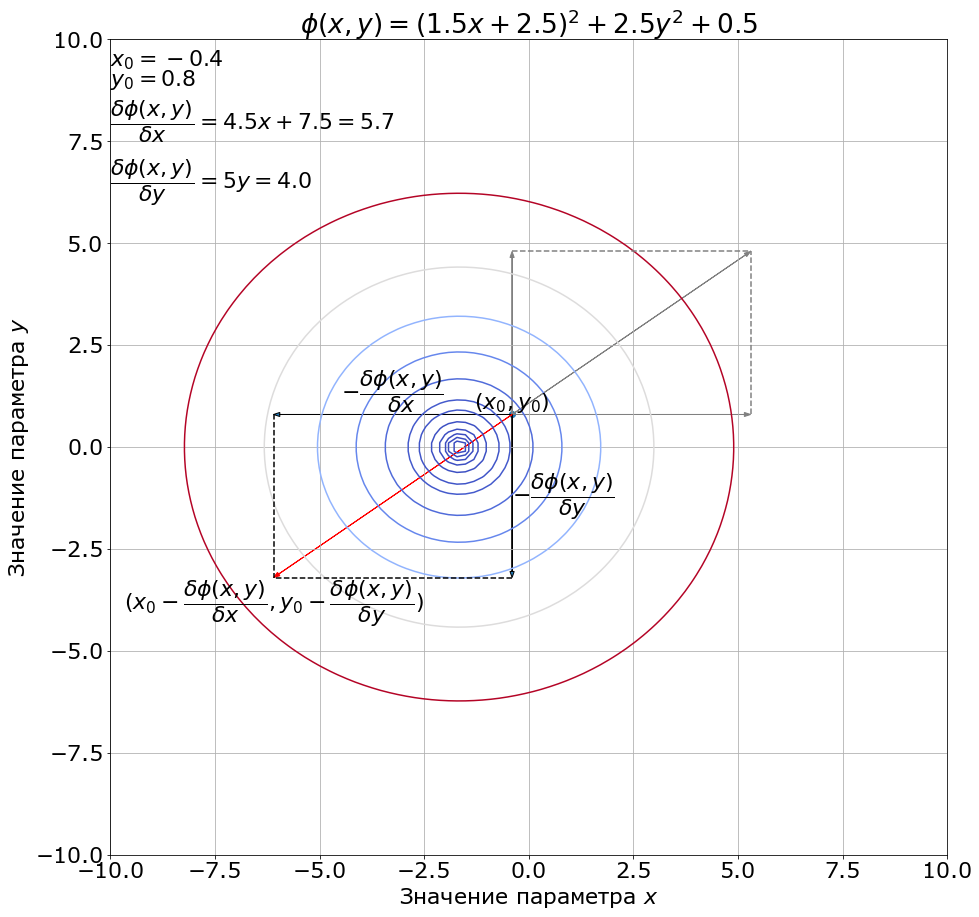

In [38]:
plot_3d_func_with_grad(x0=-0.4, y0=0.8, pos_neg_grad='negative')

In [69]:
plot_3d_func_with_grad_interactive()

A Jupyter Widget

Тогда определим нашу функцию ошибки от параметров $k, b$:

$J(k, b) = \dfrac{1}{N}\sum_{i=1}^{N}{(\hat{y_i} - y_i)^2}= \dfrac{1}{N} \sum_{i=1}^{N}{( (k X + b)  - y_i)^2}$

Для нахождения этих коэффициентов также используем градиентный спуск. Но теперь нам необходимо найти производную от функции ошибки для каждого параметра.

$\dfrac{\delta  J(k, b)}{\delta b} = \dfrac{2}{N}\sum_{i=1}^{N} ((k X_i + b)  - y_i)$ 

$\dfrac{\delta J(k, b)}{\delta k} = \dfrac{2}{N}\sum_{i=1}^{N} ((k X_i + b)  - y_i)X_i$ 

**Добавить ввход выход**

In [40]:
def gradient_function(k, b, X, y):
    N = X.shape[0]

    grad_b = 2*np.sum( ((k * X + b) - y)) / N                       
    grad_k = 2*np.sum( ((k * X + b) - y) * X) / N                       
    return np.array([grad_k, grad_b])

k = 5
b = 1
print(gradient_function(k, b, X, y))

[1.37133 4.338  ]


Тогда алгоритм градиентного спуска можно описать следующим образом:

* Выбираем случайное значение для $k$ и $b$
* Повторить пока не сойдется:

    &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; $b_{new} = b  - \alpha \cdot \dfrac{\delta J(k, b)}{\delta b} $ 
    
    &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; $k_{new} = k - \alpha \cdot \dfrac{\delta J(k, b)}{\delta k} $ 
    
    &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; $b = b_{new}$, 
    
    &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;  $k = k_{new}$
    

Где $\alpha$ это коэффициент, который мы выбираем. 

**Добавить ввход выход**

In [41]:
def gradient_descent(k_init, b_init, X, y, alpha, iters):
    k = k_init
    b = b_init
    for i in range (0, iters):
        gradients = gradient_function(k, b, X, y)
        k = k - (alpha * gradients[0])
        b = b - (alpha * gradients[1])
    
    return k, b


k_init = -5
b_init = 0
alpha = 0.75
iters = 250


k, b = gradient_descent(k_init, b_init, X, y, alpha, iters)
print(k, b)

0.5514290755763614 0.09225031244592823


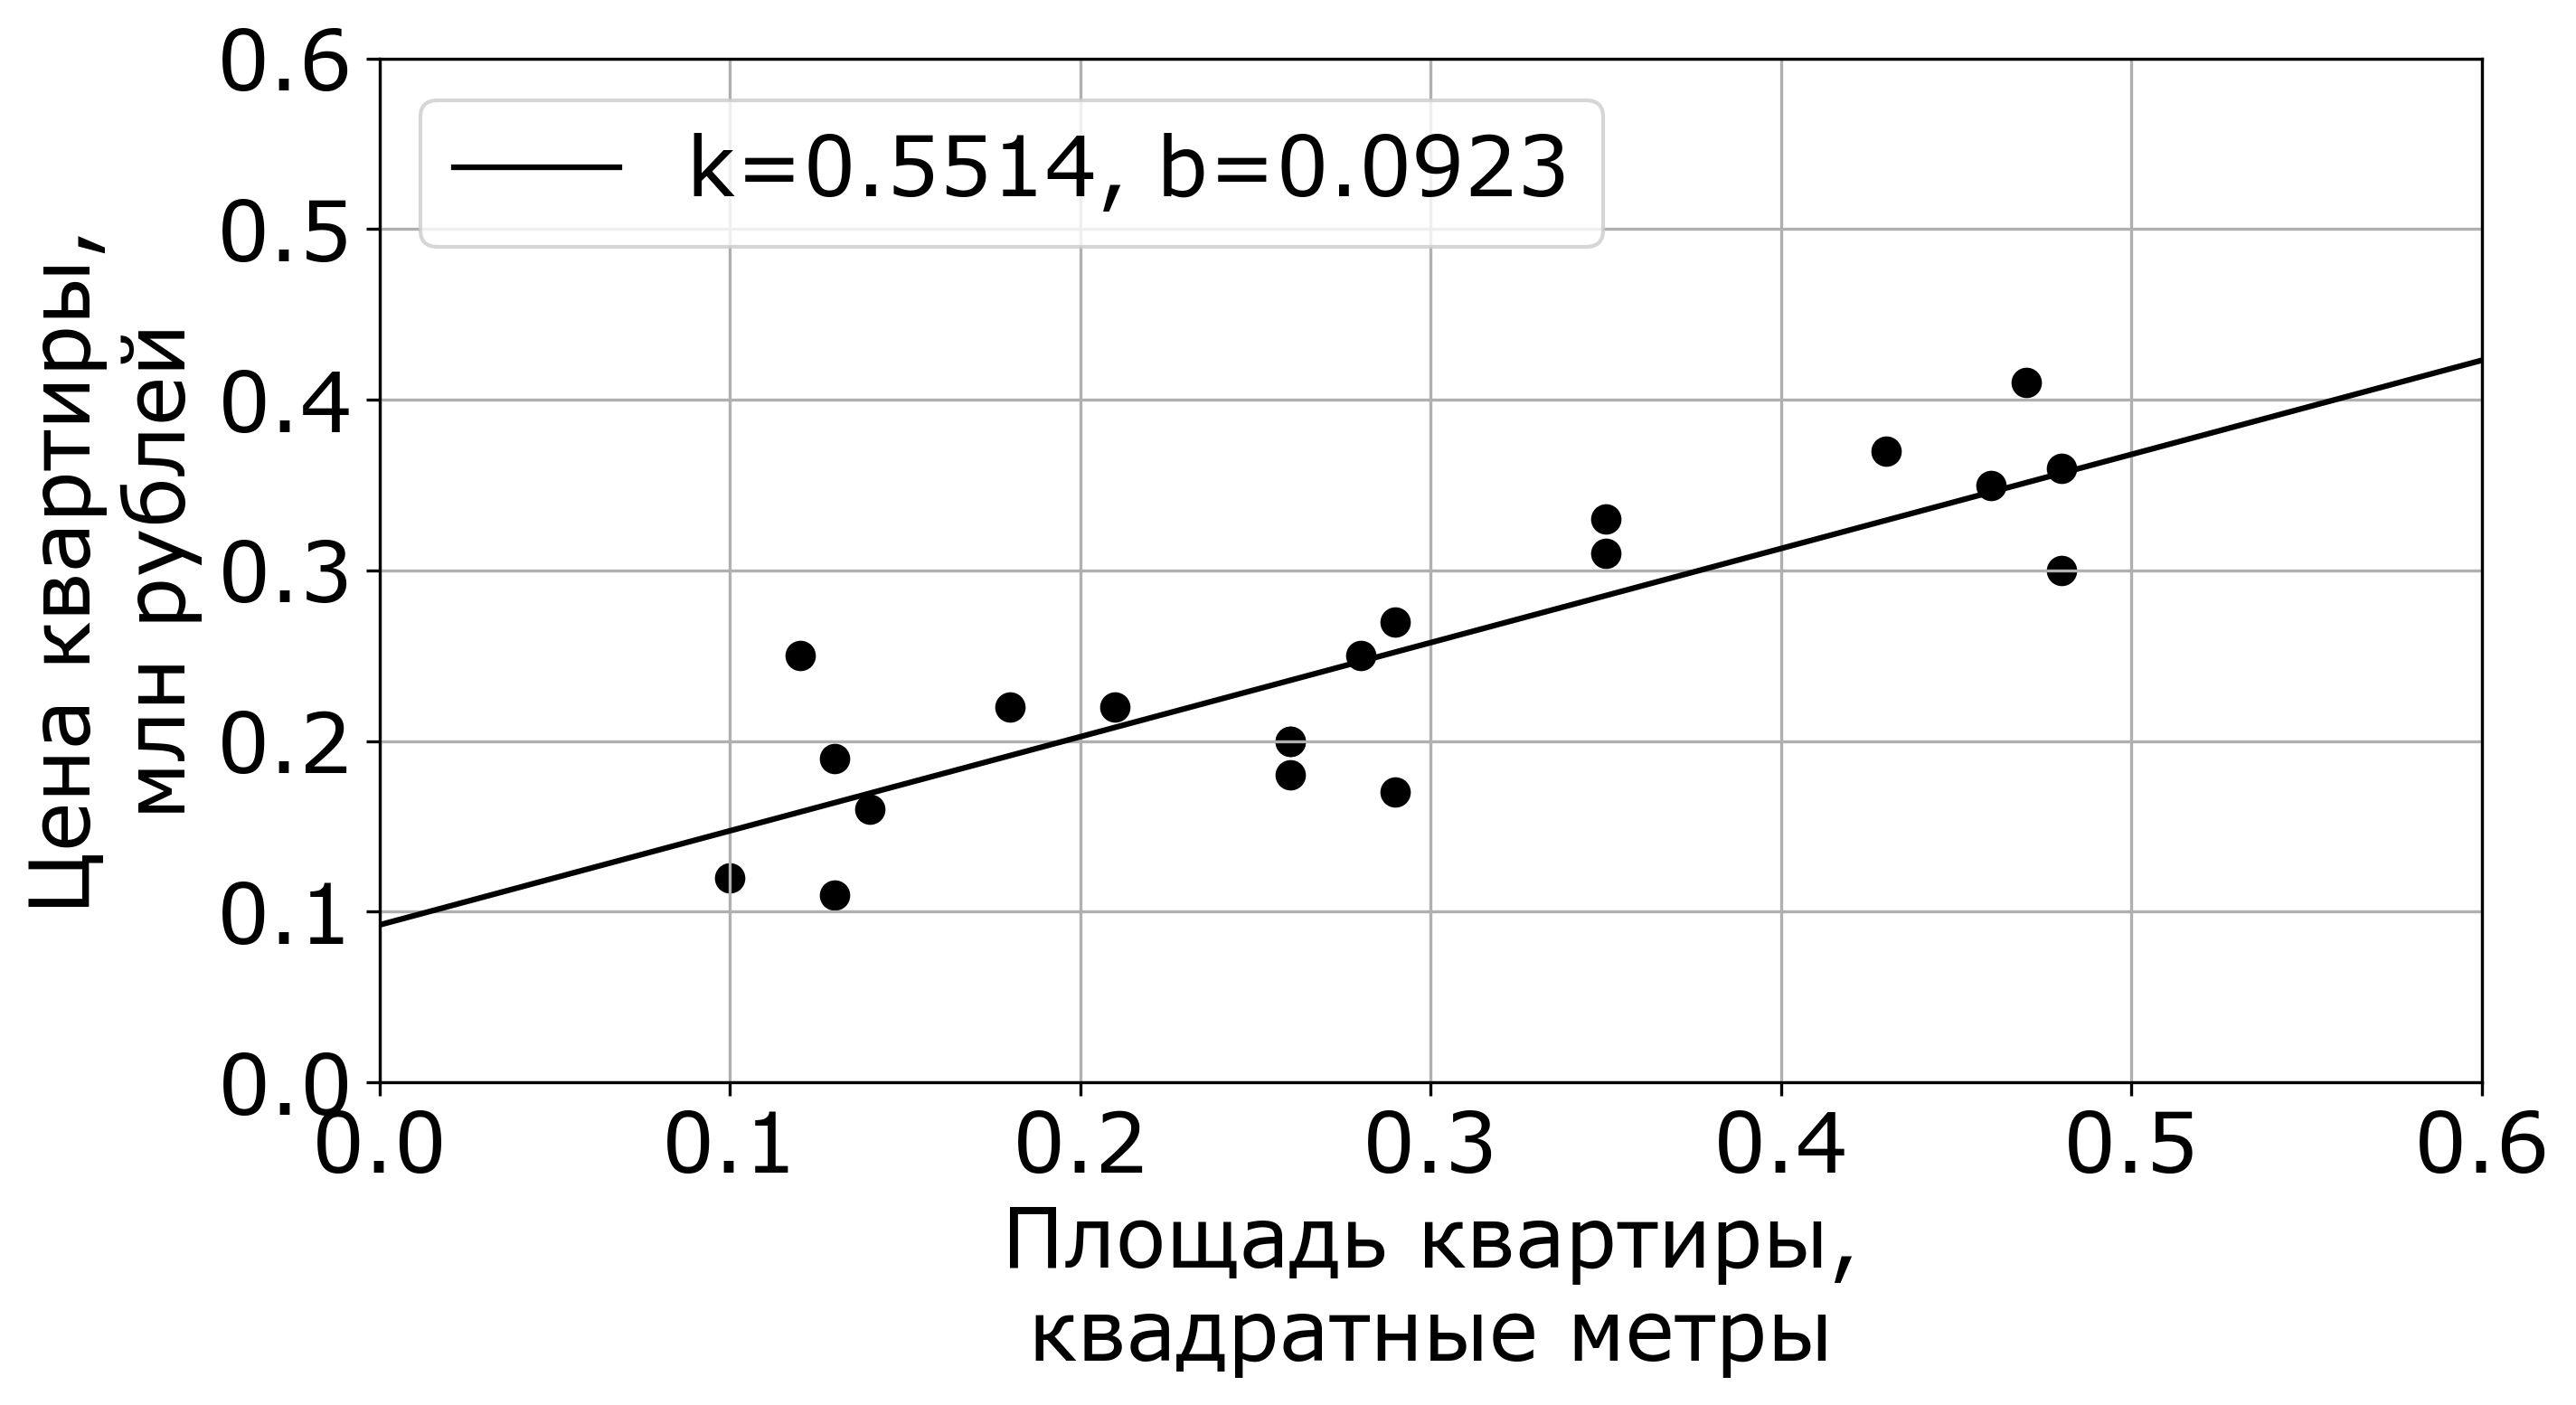

In [60]:
plot_data_and_hyp_with_bias(X, y, k, b)

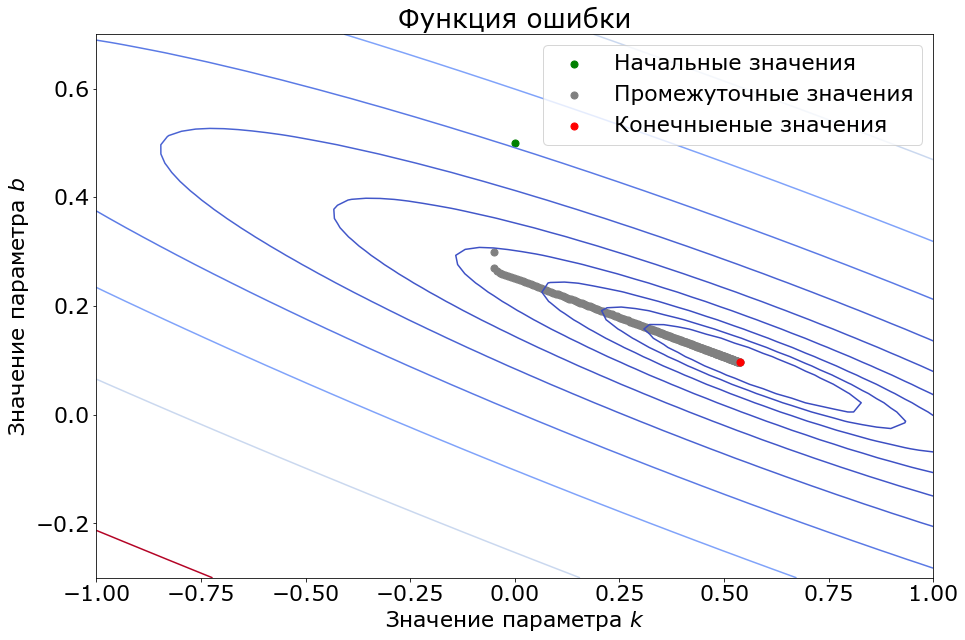

In [73]:
#alpha=0.75 интересный случай
plot_gradient_descent_in_3d(X, y, iters=250, alpha=0.4)

In [75]:
plot_gradient_descent_in_3d_interactive(X, y, iters=200, alpha=0.75)

A Jupyter Widget